In [311]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import seaborn as sns
sns.set_style("ticks")


def fillpretty(x,y,yerr,ax):
    ax.fill_between(x,np.maximum(0,y-yerr),y+yerr,alpha=0.5)
prop = lambda a, astd, b, bstd: np.sqrt((astd/a)**2+(bstd/b)**2)
    

Find best T

In [128]:
def findnum(a):
    for i in range(int(a/2+3)):
        if a%(int(a/2+3)-i) == 0:
            return (int(a/2+3)-i)
        

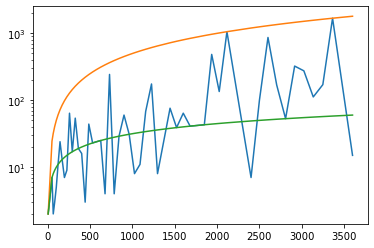

In [173]:
dat = np.genfromtxt("exam-handout/finding_T_2.csv",delimiter = ",",skip_header = 1,dtype=int)

x = dat[:,0][dat[:,1] != 1]
y = dat[:,1][dat[:,1] != 1]

plt.plot(x,y)
# plt.plot(dat[:,0],[findnum(d) for d in dat[:,0]],'.')
# plt.plot(dat[:,0],np.sqrt(dat[:,0]))
plt.plot(x,x/2)
plt.plot(x,np.sqrt(x))

plt.yscale("log")

In [101]:
# [(d,math.gcd(d,d)) for d in dat[:,1]]
dat[:,1]

array([ 1,  1,  3,  1,  1,  2,  7,  2,  3, 10, 11,  8, 13,  2,  5, 16, 17,
       18, 19, 16, 21, 11,  1, 24,  5, 26, 27, 28, 29, 25,  1,  2,  9,  2,
       35,  3, 37,  4, 39, 32, 41,  6,  1, 16, 25,  2,  1, 16,  1, 25, 51,
       13,  1,  9, 25, 49, 57,  4, 59, 24,  1, 31,  1,  4,  5])

Times at different T's for fixed size 

30


<ErrorbarContainer object of 3 artists>

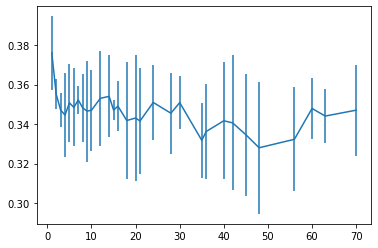

In [156]:
dat = np.genfromtxt(f"exam-handout/times_for_T_for_5040_1.csv",delimiter = ",",skip_header = 1,dtype=float)
x,y = dat[1:,0],dat[1:,1]
x[0] = 1
X = x[y!=-1]
Y = y[y!=-1]
print(len(Y))

for i in range(2,7):
    dat = np.genfromtxt(f"exam-handout/times_for_T_for_5040_{i}.csv",delimiter = ",",skip_header = 1,dtype=float)
    x,y = dat[1:,0],dat[1:,1]
    x[0] = 1
    x = x[y!=-1]
    y = y[y!=-1]
    Y = np.append(Y,y)
Y = Y.reshape(6,len(y))

plt.errorbar(X,np.mean(Y,axis=0),yerr=np.std(Y,axis=0))

# plt.vlines(np.sqrt(5040),0,4)
# math.gcd(5040,5040)

Transpose

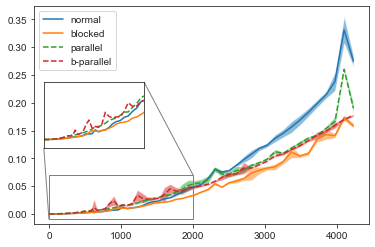

In [327]:
dat = np.genfromtxt("exam-handout/transpose_normal.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_normal = np.mean(times,axis = 1)
std_times_normal = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_blocked_sqrt.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_blocked = np.mean(times,axis = 1)
std_times_blocked = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_parallel.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_parallel = np.mean(times,axis = 1)
std_times_parallel = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_blocked_parallel.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_blocked_parallel = np.mean(times,axis = 1)
std_times_blocked_parallel = np.std(times,axis = 1)




# plt.errorbar(sizes,avg_times,yerr = std_times,fmt=".")
# plt.

fig, ax = plt.subplots()

fillpretty(sizes,avg_times_normal,std_times_normal,ax)
ax.plot(sizes,avg_times_normal,ls='-',label = "normal")

fillpretty(sizes,avg_times_blocked,std_times_blocked,ax)
ax.plot(sizes,avg_times_blocked,ls='-',label = "blocked")

fillpretty(sizes,avg_times_parallel,std_times_parallel,ax)
ax.plot(sizes,avg_times_parallel,ls='--',label = "parallel")

fillpretty(sizes,avg_times_blocked_parallel,std_times_blocked_parallel,ax)
ax.plot(sizes,avg_times_blocked_parallel,ls='--',label = "b-parallel")
ax.legend(loc="upper left")

axins = inset_axes(ax,  "30%", "30%" ,loc="center left", borderpad=1)

axins.plot(sizes,avg_times_normal,ls='-',label = "normal")
axins.plot(sizes,avg_times_blocked,ls='-',label = "blocked")
axins.plot(sizes,avg_times_parallel,ls='--',label = "parallel")
axins.plot(sizes,avg_times_blocked_parallel,ls='--',label = "b-parallel")

axins.set_xticks([])
axins.set_yticks([])

axins.set_xlim(0,2000)
axins.set_ylim(-0.01,0.07)

mark_inset(ax,axins,1,3,color = "black",fc="none", ec="0.5")

# ax.set_yscale("log")
# sns.despine()
plt.show()

C:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


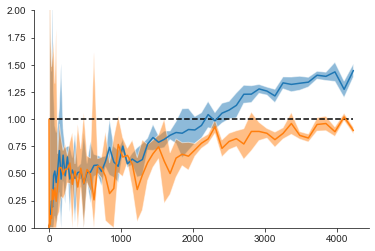

In [321]:
speedup_normal = avg_times_normal/avg_times_parallel
speedup_blocked = avg_times_blocked/avg_times_blocked_parallel

speedup_normal_std = np.sqrt((std_times_normal/avg_times_normal)**2+(std_times_parallel/avg_times_parallel)**2)
speedup_blocked_std = np.sqrt((std_times_blocked/avg_times_blocked)**2+(std_times_blocked_parallel/avg_times_blocked_parallel)**2)


fig, ax = plt.subplots()

fillpretty(sizes,speedup_normal,speedup_normal_std,ax)
plt.errorbar(sizes,speedup_normal)


fillpretty(sizes,speedup_blocked,speedup_blocked_std,ax)
plt.errorbar(sizes,speedup_blocked)
# plt.plot(sizes[1:],speedup_blocked[1:])

ax.hlines(1,min(sizes),max(sizes),ls='--',color ="black")

ax.set_ylim(0,2)
sns.despine()


Matmul

In [323]:
dat = np.genfromtxt("exam-handout/matmul_normal.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_normal = np.mean(times,axis = 1)
std_normal = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_locality.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_locality = np.mean(times,axis = 1)
std_locality = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_parallel.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_parallel = np.mean(times,axis = 1)
std_parallel = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_transpose.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_transpose = np.mean(times,axis = 1)
std_transpose = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_transpose_parallel.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_transpose_parallel = np.mean(times,axis = 1)
std_transpose_parallel = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_locality_parallel.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_locality_parallel = np.mean(times,axis = 1)
std_locality_parallel = np.std(times,axis = 1)


matmuls = [avg_normal,avg_locality,avg_parallel,avg_transpose,avg_transpose_parallel,avg_locality_parallel]
matmul_stds = [std_normal,std_locality,std_parallel,std_transpose,std_transpose_parallel,std_locality_parallel]
matmul_names = ["normal","locality","parallel","transpose","transpose parallel","locality parallel"]


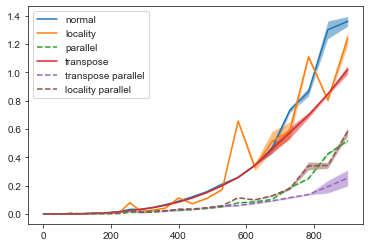

In [325]:
fig, ax = plt.subplots()

for mm, std, name in zip(matmuls,matmul_stds,matmul_names):
    fillpretty(sizes,mm,std,ax)
    ls = "--" if "parallel" in name else "-"
    ax.plot(sizes,mm,ls=ls,label = name)


ax.legend(loc="upper left")
plt.show()

C:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


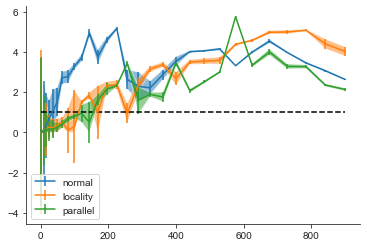

In [316]:
matmul_speedups = [avg_normal/avg_parallel,avg_transpose/avg_transpose_parallel,avg_locality/avg_locality_parallel]


matmul_speedups_stds = [prop(avg_normal,std_normal,avg_parallel,std_parallel),
                       prop(avg_transpose,std_transpose,avg_transpose_parallel,std_transpose_parallel),
                       prop(avg_locality,std_locality,avg_locality_parallel,std_locality_parallel)]

speedup_blocked = avg_times_blocked/avg_times_blocked_parallel

speedup_normal_std = np.sqrt((std_times_normal/avg_times_normal)**2+(std_times_parallel/avg_times_parallel)**2)
speedup_blocked_std = np.sqrt((std_times_blocked/avg_times_blocked)**2+(std_times_blocked_parallel/avg_times_blocked_parallel)**2)


fig, ax = plt.subplots()

for speed, std, name in zip(matmul_speedups,matmul_speedups_stds,matmul_names):
    fillpretty(sizes,speed,std,ax)
    plt.errorbar(sizes,speed,yerr=std,label=name)

ax.hlines(1,min(sizes),max(sizes),ls='--',color ="black")
plt.legend()
sns.despine()